MovieWriter imagemagic unavailable; using Pillow instead.


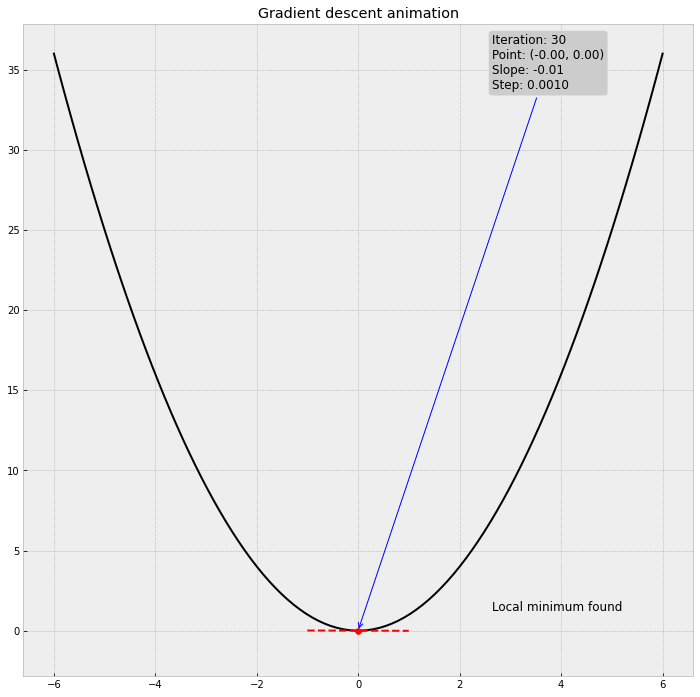

In [1]:
# https://www.kaggle.com/code/trolukovich/animating-gradien-descent/notebook

# Importing all necessary
import numpy as np
import gc
import os
import matplotlib.pyplot as plt

from matplotlib.animation import ArtistAnimation
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid
from IPython.display import Image, display, HTML

plt.style.use('bmh')


images = []  
  
fig, ax = plt.subplots(figsize = (12,12))
x = np.linspace(-6,6,100)
px = float(-4) # Starting x coordinate

def function(x):
    return x**2

def derivative(x):
    return x*2

lr=0.1
precision = 0.001
name = 'anim.gif'
fps = 5
# Function plot
f = plt.plot(x, function(x), color = 'k')

for frame in range(100):
    old_px = px # Saving old px value to calculate step

    # Plot point to track
    py = function(px) # Y coordinate of point    
    point = plt.scatter(px, py, color = 'r', zorder = 2.5)

    # Plot tangent line to the graph at (px, py) point
    slope = derivative(px)
    y_intercept = py - slope * px
    tx = np.arange(px - 1, px + 2, 2) # X coordinates of tangent line
    ty = slope * tx + y_intercept # Y coordinates of tangent line
    tangent = plt.plot(tx, ty, 'r--')    
    # Calculate new value of px
    px = px - lr * slope
    step = abs(old_px - px)

    # Plot text info
    bbox_args = dict(boxstyle="round", fc="0.8")
    arrow_args = dict(arrowstyle = '->', color = 'b', linewidth = 1)
    text = f'Iteration: {frame}\nPoint: ({px:.2f}, {py:.2f})\nSlope: {slope:.2f}\nStep: {step:.4f}'
    text = ax.annotate(text, xy = (px, py), xytext = (0.7, 0.9), textcoords = 'axes fraction', bbox = bbox_args, arrowprops=arrow_args, fontsize = 12)

    plt.title('Gradient descent animation')    
    
    # Stopping algorithm if desired precision have been met
    if step <= precision:
        text2 = plt.text(0.7, 0.1, 'Local minimum found', fontsize = 12, transform = ax.transAxes)
        images.append([f[0], tangent[0], point, text, text2])
        break

    images.append([f[0], tangent[0], point, text])
    
anim = ArtistAnimation(fig, images) 
anim.save(name, writer = 'imagemagic', fps = fps)
    

In [2]:
# Importing all necessary
import numpy as np
import gc
import os
import matplotlib.pyplot as plt

from matplotlib.animation import ArtistAnimation
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid
from IPython.display import Image, display, HTML

plt.style.use('bmh')
# Displaying animation
HTML('<img src="anim.gif" />')

In [3]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [4]:
%%HTML
<video width=400 controls>
  <source src="small.mp4" type="video/mp4">
</video>

# Click below to see the animation
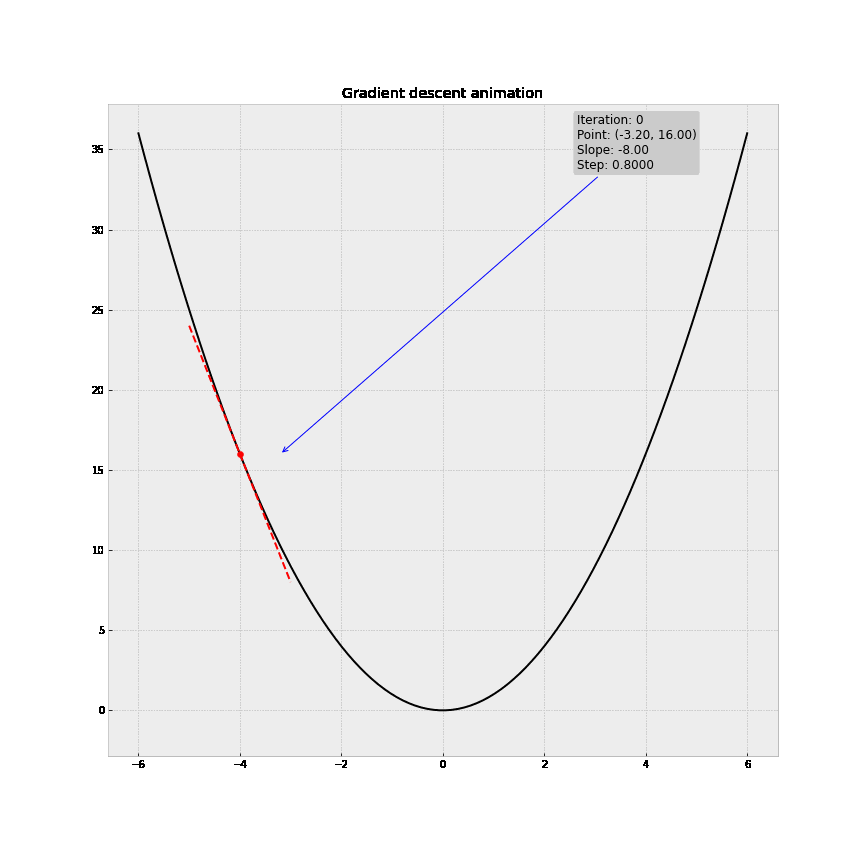